<a href="https://colab.research.google.com/github/Nacho2904/CURSO-LEARNING1/blob/tareas/tarea_de_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea de dl

## setup

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

## I) Aproximación universal

### I-I, clasificación

#### I-I-I

Generar una base de datos de una XOR con todas las posibles combinaciones de
±1 (4 casos). Asignar los labels correspondientes (1 si ambas entradas son diferentes,
0 si son iguales)

In [21]:
# Utilizo ⊕ para denotar el operador XOR entre dos elementos
X = np.array([1,0,1,0,1,1,1,1,0,0,0,0]).reshape(4,3)
df_xor = pd.DataFrame(X)
df_xor.columns = ["Value of X", "Value of Y", "Value of X⊕Y"]
df_xor

,Value of X,Value of Y,Value of X⊕Y
0,1,0,1
1,0,1,1
2,1,1,0
3,0,0,0


#### I-I-II

Entrenar una red neuronal con activación ReLU que alcance 100 % de accuracy.
¿Cuál es la mínima dimensión de la unidad oculta para lograr esto?

In [149]:
input = tf.keras.layers.Input(shape = (2,), name = "Input_layer")
x_1 = tf.keras.layers.Dense(4, name = "First_hidden_unit", activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 First_hidden_unit (Dense)   (None, 4)                 12        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


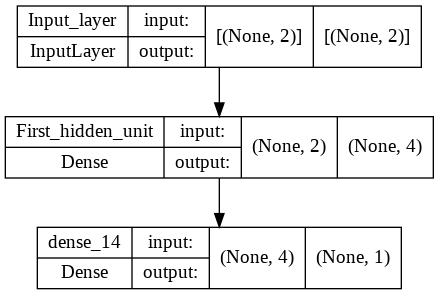

In [145]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [150]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=df_xor[["Value of X", "Value of Y"]], y=df_xor["Value of X⊕Y"], batch_size = 4, epochs=300,callbacks=[early_stop]);

Epoch 1/300
1/1 [==============================] - 0s 297ms/step - loss: 0.7205 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 0.7149 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 11/300
1/1 [=======

#### I-I-III

repetir con activación sigmoide. Extraer conclusiones.

In [183]:
input = tf.keras.layers.Input(shape = (2,), name = "Input_layer")
x_1 = tf.keras.layers.Dense(2, name = "First_hidden_unit", activation = "sigmoid")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 First_hidden_unit (Dense)   (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [184]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=df_xor[["Value of X", "Value of Y"]], y=df_xor["Value of X⊕Y"], batch_size = 4, epochs=300,callbacks=[early_stop]);

Epoch 1/300
1/1 [==============================] - 0s 303ms/step - loss: 0.7504 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 0.9954 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 1.3741 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3919 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0541 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0693 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0667 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0639 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0603 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0574 - accuracy: 0.5000
Epoch 11/300
1/1 [========

### I-II) Regresión

#### I-II-I

Generar una base de datos de la función f (x, y, z) = sin(x) + cos(y) + z. Para ello
barra una grilla de 20 puntos para cada coordenada (0 ≤ x < 2π, 0 ≤ y < 2π y
0 ≤ z ≤ 1) y arme una base de datos con las 8000 combinaciones posibles.

In [236]:
f = lambda x,y,z: np.sin(x) + np.cos(y) + z
x_axis = np.arange(0,2*np.pi, np.pi/10)
y_axis = np.arange(0,2*np.pi, np.pi/10)
z_axis = np.arange(0,1,1/20)

x_y_z_coordinates = [[x,y,z] for x in x_axis for y in y_axis for z in z_axis]
df_function = pd.DataFrame(x_y_z_coordinates)
df_function.columns = ["x", "y", "z"]
df_function["f(x,y,z)"] = f(df_function["x"],df_function["y"],df_function["z"])
df_function

,x,y,z,"f(x,y,z)"
0,0.000000,0.000000,0.00,1.00000
1,0.000000,0.000000,0.05,1.05000
2,0.000000,0.000000,0.10,1.10000
3,0.000000,0.000000,0.15,1.15000
4,0.000000,0.000000,0.20,1.20000
...,...,...,...,...
7995,5.969026,5.969026,0.75,1.39204
7996,5.969026,5.969026,0.80,1.44204
7997,5.969026,5.969026,0.85,1.49204
7998,5.969026,5.969026,0.90,1.54204


#### I-II-II

Entrenar una red neuronal con activación ReLU e indique el error cuadrático medio. Grafique f(x, x, x) y comparela con la salida del regresor barriendo x.

In [315]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_66 (Dense)            (None, 128)               512       
                                                                 
 dense_67 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [316]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = len(df_function), epochs=10000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step - loss: 0.1076
Epoch 7502/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1076
Epoch 7503/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1076
Epoch 7504/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7505/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7506/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7507/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7509/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7510/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.1075
Epoch 7511/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7512/10000
1/1 [====================

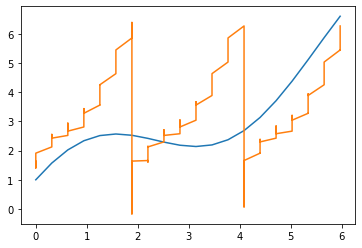

In [318]:
df_function["f(x,x,x)"] = f(df_function["x"], df_function["x"], df_function["x"])
df_function
xxx_matrix = np.array([df_function["x"],df_function["x"],df_function["x"]]).reshape(8000,3)
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

#### I-II-III

In [321]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "sigmoid")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_70 (Dense)            (None, 128)               512       
                                                                 
 dense_71 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [323]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.015),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = len(df_function), epochs=10000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step - loss: 0.1561
Epoch 7502/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1561
Epoch 7503/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1561
Epoch 7504/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.1561
Epoch 7505/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7506/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.1560
Epoch 7507/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7509/10000
1/1 [==============================] - 0s 257ms/step - loss: 0.1559
Epoch 7510/10000
1/1 [==============================] - 0s 24ms/step - loss: 0.1559
Epoch 7511/10000
1/1 [==============================] - 0s 26ms/step - loss: 0.1559
Epoch 7512/10000
1/1 [===================

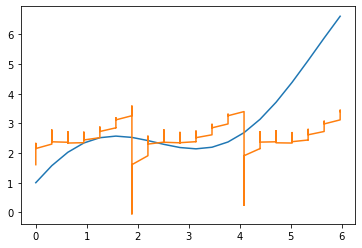

In [324]:
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

In [333]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_76 (Dense)            (None, 128)               512       
                                                                 
 dense_77 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Usando SGD en vez de GD tradicional

In [334]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = 32, epochs=10000,callbacks=[es])

Epoch 1/10000
250/250 [==============================] - 1s 1ms/step - loss: 0.7386
Epoch 2/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.4952
Epoch 3/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.4205
Epoch 4/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.3756
Epoch 5/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 6/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.3107
Epoch 7/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.2853
Epoch 8/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.2630
Epoch 9/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 10/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.2247
Epoch 11/10000
250/250 [==============================] - 0s 1ms/step - loss: 0.2097
Epoch 12/10000
250/250 [==============================] - 0s 1ms/step - lo

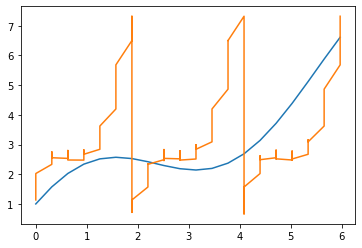

In [335]:
df_function["f(x,x,x)"] = f(df_function["x"], df_function["x"], df_function["x"])
df_function
xxx_matrix = np.array([df_function["x"],df_function["x"],df_function["x"]]).reshape(8000,3)
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);